# COVID-19 Data Visualization
## Author: Zhou Yuchen

## Part 1: Exploring dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1.0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0.0,0.0
1,2.0,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0.0,0.0
2,3.0,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0.0,0.0
3,4.0,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0.0,0.0
4,5.0,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0.0,0.0
...,...,...,...,...,...,...,...,...
191772,191773.0,12/31/2020,Zeeland,Netherlands,44197.2,10462,127.0,0.0
191773,191774.0,12/31/2020,Zhejiang,Mainland China,44197.2,1306,1.0,1293.0
191774,191775.0,12/31/2020,Zhytomyr Oblast,Ukraine,44197.2,39202,655.0,31998.0
191775,191776.0,12/31/2020,Zuid-Holland,Netherlands,44197.2,202237,2820.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191777 entries, 0 to 191776
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              191776 non-null  float64
 1   ObservationDate  191776 non-null  object 
 2   Province/State   139629 non-null  object 
 3   Country/Region   191776 non-null  object 
 4   Last Update      191776 non-null  object 
 5   Confirmed        191777 non-null  int64  
 6   Deaths           191776 non-null  float64
 7   Recovered        191776 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 11.7+ MB


### Summarize the characteristics of the dataset in words: what does it represent, what are the fields/columns/rows, what data types are they, etc (30 pts)

The dataset represents covid-19 observations data. We can get the change in the number of people diagnosed in the top 10 GDP countries.
Changes in the three indicators of diagnosis, death and cure in the United States and the proportion of people diagnosed in the top 10 GDP countries in the global data.

It has 191777 rows and 8 columns. Column description:

- Sno - Serial number
- ObservationDate - Date of the observation in MM/DD/YYYY
- Province/State - Province or state of the observation (Could be empty when missing)
- Country/Region - Country of observation
- Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before - using it)
- Confirmed - Cumulative number of confirmed cases till that date
- Deaths - Cumulative number of of deaths till that date
- Recovered - Cumulative number of recovered cases till that date

### What is the "name" of the dataset?

covid_19_data.csv

### Where did you obtain it?

Internet.

### Where can we obtain it? (i.e., URL)

data source：https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

record data: from 2020-02-01 to 2020-12-31

### What is the license of the dataset? What are we allowed to do with it?

It is allowed to be downloaded and shared on the Internet.

### How big is it in file size and in items?

Its file size is 10.8 MB, and it has 1,534,216 items (191777 rows x 8 columns).

### Make a simple plot showing a relationship of interest.

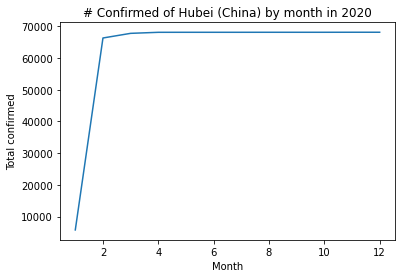

In [4]:
hubei = df[df['Province/State']=='Hubei']
hubei['month'] = hubei['ObservationDate'].apply(lambda x: int(x.split('/')[0]))

hubei = hubei[['month','Confirmed']].groupby('month').max().reset_index()
plt.plot(hubei.month, hubei.Confirmed)
plt.xlabel('Month')
plt.ylabel('Total confirmed')
plt.title('# Confirmed of Hubei (China) by month in 2020')
plt.show()

## Part 2 & 3: Visualization

Visualizations of the three sections:

1. The change in the number of people diagnosed in the top 10 GDP countries
2. Changes in the three indicators of diagnosis, death and cure in the United States 
3. The proportion of people diagnosed in the top 10 GDP countries in the global data

### 1. The change in the number of people diagnosed in the top 10 GDP countries

Calculate the top 10 GDP countries: the US, China, Japan, Germany, France, UK, India, Italy, Brazil, and Canada. To map the changes in the number of people diagnosed in these 10 countries, you first need to generate a list of the number of people diagnosed in each country.
Looking at the data, we know that a country often contains multiple provinces/states, which should be added together as the data of a country, so we group the countries first:

In [5]:
# Data processing

# Rename the column name
df = df.rename(columns={'Country/Region':'Country'})
df = df.rename(columns={'ObservationDate':'Date'})

df_Country = df.groupby(['Country'])  # According to the Country grouping
date = df['Date'].drop_duplicates().values.tolist()  # Remove duplicate lines
date_list = [str(x) for x in date]  # Converts the numeric type in the list to the str type

# Mainland China
grouped = df_Country.get_group('Mainland China')
china_data = grouped.groupby('Date').sum()
china_confirmed = china_data['Confirmed'].tolist()

# US
grouped = df_Country.get_group('US')
us_data = grouped.groupby('Date').sum()
us_confirmed = us_data['Confirmed'].tolist()

# Brazil
grouped = df_Country.get_group('Brazil')
brazil_data = grouped.groupby('Date').sum()
brazil_confirmed = brazil_data['Confirmed'].tolist()

# UK
grouped = df_Country.get_group('UK')
uk_data = grouped.groupby('Date').sum()
uk_confirmed = uk_data['Confirmed'].tolist()

# India
grouped = df_Country.get_group('India')
india_data = grouped.groupby('Date').sum()
india_confirmed = india_data['Confirmed'].tolist()

# France
grouped = df_Country.get_group('France')
france_data = grouped.groupby('Date').sum()
france_confirmed = france_data['Confirmed'].tolist()

# Germany
grouped = df_Country.get_group('Germany')
germany_data = grouped.groupby('Date').sum()
germany_confirmed = germany_data['Confirmed'].tolist()

# Italy
grouped = df_Country.get_group('Italy')
italy_data = grouped.groupby('Date').sum()
italy_confirmed = italy_data['Confirmed'].tolist()

# Canada
grouped = df_Country.get_group('Canada')
canada_data = grouped.groupby('Date').sum()
canada_confirmed = canada_data['Confirmed'].tolist()

# Japan
grouped = df_Country.get_group('Japan')
japan_data = grouped.groupby('Date').sum()
japan_confirmed = japan_data['Confirmed'].tolist()

countries_confirmed = [china_confirmed, us_confirmed, brazil_confirmed, uk_confirmed, india_confirmed, france_confirmed,
                       germany_confirmed, italy_confirmed, canada_confirmed, japan_confirmed]
for country in countries_confirmed:
    if len(country) < len(date_list):
        for i in range(len(date_list) - len(country)):
            country.insert(0, 0)

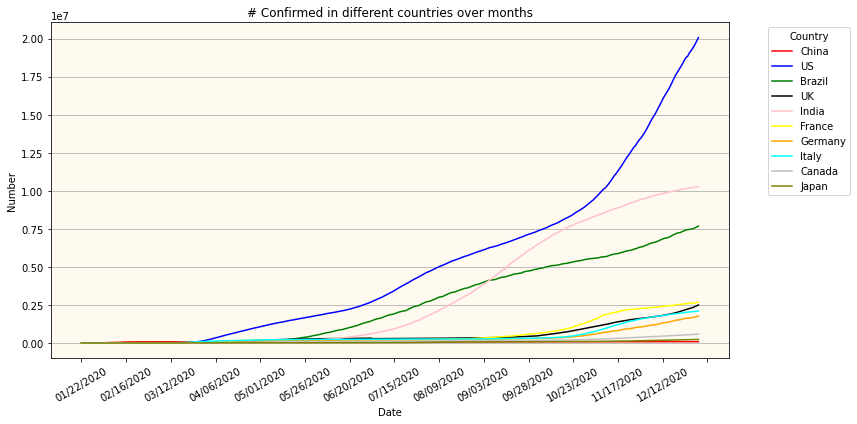

In [6]:
# Visualization

plt.figure(figsize=(12, 6))  # enlarge the visualization

plt.plot(date_list, china_confirmed, color='red', label="China")
plt.plot(date_list, us_confirmed, color='blue', label="US")
plt.plot(date_list, brazil_confirmed, color='green', label="Brazil")
plt.plot(date_list, uk_confirmed, color='black', label="UK")
plt.plot(date_list, india_confirmed, color='pink', label="India")
plt.plot(date_list, france_confirmed, color='yellow', label="France")
plt.plot(date_list, germany_confirmed, color='orange', label="Germany")
plt.plot(date_list, italy_confirmed, color='#00FFFF', label="Italy")
plt.plot(date_list, canada_confirmed, color='#C0C0C0', label="Canada")
plt.plot(date_list, japan_confirmed, color='#808000', label="Japan")
plt.title("# Confirmed in different countries over months")
plt.xlabel("Date")
plt.ylabel("Number")
plt.grid(axis='y') 
ax = plt.gca() 
ax.set_facecolor('#FFFAF0') 
tick_spacing = 25
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=30) 
plt.legend(title='Country', bbox_to_anchor = (1.05, 1))  # make the legend outside plot
plt.tight_layout()
plt.show()

As shown from the line plot above, the United States is leading the pack, followed by Brazil and India.

### 2. Three indicators of change in the United States

In [7]:
# (Updating) Drawing interactive Stack Chart

info = ['Deaths','Recovered','Confirmed']
color = ['#FF4040','#87CEFA','#FFF68F']
plt.figure(figsize=(12, 6))  # enlarge the visualization

# use interaction
@interact(show=['All','Deaths','Recovered','Confirmed'])
def f(show):
    # Processing data
    x = show
    us_confirmed = us_data['Confirmed'].tolist()
    us_deaths = us_data['Deaths'].tolist()
    us_recovered = us_data['Recovered'].tolist()
    if len(us_confirmed) < len(date_list):
        for i in range(len(date_list)-len(us_confirmed)):
            us_confirmed.insert(0,0)
    if len(us_deaths) < len(date_list):
        for i in range(len(date_list)-len(us_deaths)):
            us_deaths.insert(0,0)
    if len(us_recovered) < len(date_list):
        for i in range(len(date_list)-len(us_recovered)):
            us_recovered.insert(0,0)
    
    # interactive plot
    if x == 'All':
        plt.stackplot(date_list, us_deaths, us_recovered, us_confirmed, labels=['Deaths','Recovered','Confirmed'], colors=color)
    elif x == 'Deaths':
        plt.stackplot(date_list, us_deaths, labels=['Deaths'], colors=color[0])
    elif x == 'Recovered':
        plt.stackplot(date_list, us_recovered, labels=['Recovered'], colors=color[1])
    elif x == 'Confirmed':
        plt.stackplot(date_list, us_confirmed, labels=['Confirmed'], colors=color[2])
    plt.legend(loc='upper left')
    tick_spacing = 25
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.xticks(rotation=30)
    plt.grid(axis='y') 
    plt.title("# Confirmed, Recovered, Deaths in US")
    plt.xlabel("Date")
    plt.ylabel("# Number")
    plt.tight_layout()
    plt.show()

<Figure size 864x432 with 0 Axes>

interactive(children=(Dropdown(description='show', options=('All', 'Deaths', 'Recovered', 'Confirmed'), value=…

As you can see from the stack chart above, the number of confirmed diagnoses in the United States is rapidly increasing. The death rate is decreasing.

### 3. The proportion of people diagnosed in the top 10 GDP countries in the global data

In [8]:
# Data processing

df_lastday = df.groupby(['Date']) 

# The total number of confirmed cases as of 2020.12.31 was calculated.
grouped = df_lastday.get_group('12/31/2020')
confirmed_number = grouped.groupby('Date').sum()
confirmed_number = confirmed_number['Confirmed'].tolist()
confirmed_number = confirmed_number[0]

grouped = df_Country.get_group('US')
us_data = grouped.groupby('Date').sum()
us_confirmed = us_data['Confirmed'].tolist()[-1]

grouped = df_Country.get_group('Mainland China')
china_data = grouped.groupby('Date').sum()
china_confirmed = china_data['Confirmed'].tolist()[-1]

grouped = df_Country.get_group('Japan')
japan_data = grouped.groupby('Date').sum()
japan_confirmed = japan_data['Confirmed'].tolist()[-1]

grouped = df_Country.get_group('Germany')
germany_data = grouped.groupby('Date').sum()
germany_confirmed = germany_data['Confirmed'].tolist()[-1]

grouped = df_Country.get_group('UK')
uk_data = grouped.groupby('Date').sum()
uk_confirmed = uk_data['Confirmed'].tolist()[-1]

grouped = df_Country.get_group('France')
france_data = grouped.groupby('Date').sum()
france_confirmed = france_data['Confirmed'].tolist()[-1]

grouped = df_Country.get_group('Brazil')
brazil_data = grouped.groupby('Date').sum()
brazil_confirmed = brazil_data['Confirmed'].tolist()[-1]

grouped = df_Country.get_group('India')
india_data = grouped.groupby('Date').sum()
india_confirmed = india_data['Confirmed'].tolist()[-1]

grouped = df_Country.get_group('Italy')
italy_data = grouped.groupby('Date').sum()
italy_confirmed = italy_data['Confirmed'].tolist()[-1]

grouped = df_Country.get_group('Canada')
canada_data = grouped.groupby('Date').sum()
canada_confirmed = canada_data['Confirmed'].tolist()[-1]

# Find the number of people diagnosed in the rest of the world
other = confirmed_number - us_confirmed - china_confirmed - japan_confirmed - germany_confirmed - uk_confirmed \
        - france_confirmed - brazil_confirmed - india_confirmed - italy_confirmed - canada_confirmed

# Create a dictionary
info = {
    'US': us_confirmed,
    'Mainland China': china_confirmed,
    'Japan': japan_confirmed,
    'Germany': germany_confirmed,
    'UK': uk_confirmed,
    'France': france_confirmed,
    'Brazil': brazil_confirmed,
    'India': india_confirmed,
    'Italy': italy_confirmed,
    'Canada': canada_confirmed,
    'other': other
}

info = sorted(info.items(),key=lambda x:x[1],reverse=True) 

sizes=[]
labels=[]
for i in range(len(info)):
    labels.append(info[i][0])
    sizes.append(info[i][1])

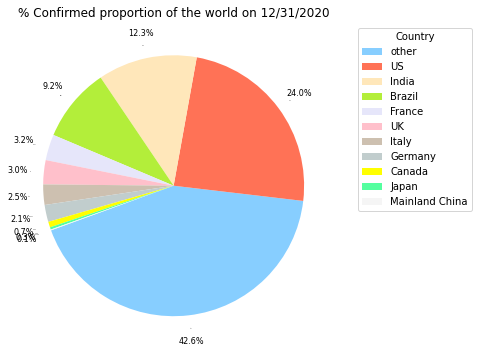

In [9]:
# Visualization

plt.figure(figsize=(12, 6))  # enlarge the visualization

colors = ['#87CEFF','#FF7256','#FFE7BA','#B3EE3A','#E6E6FA','#FFC0CB','#CDC0B0','#C1CDCD','#FFFF00','#54FF9F','#F5F5F5'] 
explode = (0,0,0,0,0,0,0,0,0,0,0)

patches,l_text,p_text = plt.pie(sizes,
                              explode=explode,
                              labels=labels,
                              colors=colors,
                              autopct='%3.1f%%', # Values are kept in fixed decimal places
                              shadow=False, # No shadow setting
                              startangle=200, 
                              pctdistance=1.2) # Distance multiple from the center of the circle
# l_text :Pie chart outside text，p_text：Text inside the pie chart
for t in l_text:
    t.set_size(-1)
for t in p_text:
    t.set_size(8)

plt.legend(title='Country', bbox_to_anchor = (1.05, 1))
plt.title('% Confirmed proportion of the world on 12/31/2020')
plt.show()

By the pie chart above, we can find that till the date 12/31/2020, the US, India, and Brazil account for nearly half of the number of confirmed cases. At the same time, China mainland controls it well.